
# Project: Investigate a Dataset (TMDB Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction<br>
> **This dataset(TMDB Movies) represent informations about films over the history.**<br><br>

> **The Questions we can answer from this dataset are:**<br><br>
**1-**<li><a href="#1">What are the films having the highest and lowest profits?</a></li>  
**2-**<li><a href="#2">what is the runtime range of profitable films and non-profitables films?And which type of films have the long runtime {profitable ones or the non-profitable ones}?</a></li>  
**3-**<li><a href="#3">What is the year which have high productivity of profitable films?<br>
And what is the year which have low productivity of profitable films?<br>
And what is the most profitable year?<br>
And what is the most non-profitable year?</a></li>
**4-**<li><a href="#4">What are the most successful genres of profitable films?And what are the most unsuccessful genres of profitable films?</a></li>
**5-**<li><a href="#5">Who are the actors who have the greatest number of profitable films?</a></li>
**6-**<li><a href="#6">What are the production companies which have the greatest number of profitable films?</a></li>
**7-**<li><a href="#7">Who are the directors who have the greatest number of profitable films?</a></li>
**8-**<li><a href="#8">What are the average of budgets,the average of revenues,the average of profits and the average runtime for all profitable films?</a></li>

In [1]:
#import statements for all of the packages that we plan to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling<br>
> **In this stage,We will discover data to decide what is required to clean data and make it useful to analyse the data and answer the questions.**


### General Properties

In [2]:
# Load the data (tmdb_movies) and print out a few lines.
# Perform operations to inspect data types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb_movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Discover data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> **Dataset Obsevations:**<br><br>
**1-**There are many columns without any importance like (id,imdb_id,homepage,overview,keywords,budget_adj,revenue_adj).  
**2-**Column 'vote_count' has different values for every film and that ofcourse will make the values of vote_average and popularity has inaccurate values(all films must have the same number of people who vote).So columns (vote_count,vote_average,popularity) has no importance.  
**3-**Thers is no measurement unit for columns like(budget,revenue,runtime).But by logic,runtime has to be in minutes and (budget,revenue) have to be in dollars(the first currency in the world).  
**4-**Column'release_year' has string type,we must convert it to datetime type.

### Data Cleaning (Drop and cleaning data from unuseful columns and rows<br><br>
> **Steps of cleaning data:**<br><br>
**1-**Drop duplicated rows.  
**2-**Drop useless columns to make data good enough to be explored.  
**3-**Drop rows if they have any NULL values.  
**4-**Drop rows which have unexpected values(budget == 0 or revenue == 0) or unreasonable values(budget == 113 or revenue == 100)...these values are outliers so we will drop every film which its budget  or revenue has values less than 50000 dollars.  
**5-**Converting ZERO values to NAN in (runtime,release_year) column.  
**6-**Converting data columns types like(release_date must be datetime not string).

>**1-Drop duplicated rows.**

In [4]:
# Descover how many duplicated rows are.
df.duplicated().sum()

1

In [5]:
# cleaning data from duplicated rows.
df.drop_duplicates(inplace=True)
# Testing the success of droping duplicated rows.
df.duplicated().sum()

0

> **2-Drop useless columns to make data good enough to be explored.**

In [6]:
# Drop useless columns (id,imdb_id,homepage,overview,keywords,budget_adj,revenue_adj,vote_count,vote_average,popularity)
df.drop(['id','imdb_id','homepage','overview','keywords','budget_adj','revenue_adj','vote_count','vote_average','popularity'],axis=1,inplace=True)
# testing
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
tagline                 8041 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
release_year            10865 non-null int64
dtypes: int64(4), object(7)
memory usage: 1018.6+ KB


> **3-Drop rows if they have any NULL values.**

In [7]:
# Drop Null values from the data
df.dropna(inplace=True)
# testing
df.isnull().any()

budget                  False
revenue                 False
original_title          False
cast                    False
director                False
tagline                 False
runtime                 False
genres                  False
production_companies    False
release_date            False
release_year            False
dtype: bool

> **4-Drop rows which have unexpected values(budget == 0 or revenue == 0) or unreasonable values(budget == 113 or revenue == 100)...these values are outliers so we will drop every film which its budget  or revenue has values less than 50000 dollars.**

In [8]:
# Discover the nature of values in columns (budget,revenue)
df.budget.describe(),df.revenue.describe()

(count    7.635000e+03
 mean     1.963939e+07
 std      3.508058e+07
 min      0.000000e+00
 25%      0.000000e+00
 50%      3.500000e+06
 75%      2.500000e+07
 max      4.250000e+08
 Name: budget, dtype: float64, count    7.635000e+03
 mean     5.528189e+07
 std      1.358346e+08
 min      0.000000e+00
 25%      0.000000e+00
 50%      2.260622e+06
 75%      4.802269e+07
 max      2.781506e+09
 Name: revenue, dtype: float64)

In [9]:
# Drop rows which values of columns (budget,revenue) is equal to zero
df.query('budget >= 50000',inplace=True)
df.query('revenue >= 50000',inplace=True)
# Discover the nature of values in these columns after droping ZERO values
df.budget.describe(),df.revenue.describe()

(count    3.479000e+03
 mean     3.956726e+07
 std      4.312715e+07
 min      6.000000e+04
 25%      1.100000e+07
 50%      2.500000e+07
 75%      5.125000e+07
 max      4.250000e+08
 Name: budget, dtype: float64, count    3.479000e+03
 mean     1.166487e+08
 std      1.823582e+08
 min      5.013600e+04
 25%      1.742858e+07
 50%      5.230400e+07
 75%      1.374428e+08
 max      2.781506e+09
 Name: revenue, dtype: float64)

> **5-Converting ZERO values to NAN in (runtime,release_year) columns.**<br><br>
There is no ZERO values in column 'runtime' after droping all ZERO values in columns (budget,revenue).  
There is no ZERO values in column 'release_year'.<br><br>
**That means all values of the columns(which its type is int) in the data now has no ZERO values.**

In [10]:
# Discover the nature of values in column 'runtime'
df.runtime.describe()

count    3479.000000
mean      109.446393
std        19.680526
min        26.000000
25%        96.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

In [11]:
# Discover the nature of values in column 'release_year'
df.release_year.min()

1960

> **6-Converting data columns types like(release_date must be datetime).**

In [12]:
# Converting types of data
# Converting release_date from string type to datetime type
df.release_date = pd.to_datetime(df['release_date'])
# Descover data type after converting some types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3479 entries, 0 to 10848
Data columns (total 11 columns):
budget                  3479 non-null int64
revenue                 3479 non-null int64
original_title          3479 non-null object
cast                    3479 non-null object
director                3479 non-null object
tagline                 3479 non-null object
runtime                 3479 non-null int64
genres                  3479 non-null object
production_companies    3479 non-null object
release_date            3479 non-null datetime64[ns]
release_year            3479 non-null int64
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 326.2+ KB


<a id='1'></a>
## Exploratory Data Analysis<br><br>

### Research Question 1 (What are the films having the highest and lowest profits?)

In [13]:
# Calculate profits of every film by subtracting 'revenue' from 'budget'
df['profits'] = df['revenue'] - df['budget']

# testing
df.head(1)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,release_year,profits
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,1363528810


In [14]:
# Calculate the ratio of profits to budget
df['ratio_profit_budget'] = df['profits'] / df['budget']

# testing
df.head(1)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,release_year,profits,ratio_profit_budget
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,1363528810,9.090192


>**we need to filter data to analysis the features of profitable films.<br>we will consider that the films with profits more than "25M $" is profitable.**

In [15]:
# Divide the data into two parts:one of them for films which has profits and the other part for films which has no profits.
df_pro = df.query('profits > 25000000')
df_nonpro = df.query('profits < 25000000')

In [16]:
# To ignore 'SettingWithCopyWarning' message.
pd.options.mode.chained_assignment = None

# Make an array for profitable films and another one for non-profitable films
profitable = np.repeat('profitable',len(df_pro))
nonprofitable = np.repeat('non-profitable',len(df_nonpro))

# Add 'profit_evaluation'column to the two parts of data which determine how much success the film gains
df_pro['profit_evaluation'] = profitable
df_nonpro['profit_evaluation'] = nonprofitable

# Gather the two parts again after add 'profit_evaluation'column to them
df_profits = df_pro.append(df_nonpro)

# testing
df_profits.head(1)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,release_year,profits,ratio_profit_budget,profit_evaluation
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,1363528810,9.090192,profitable


In [17]:
# Build the fuction which returns information about films with highest and lowest values in columns as column'profits'
def max_min_values_films(column_name,value_wanted):
    '''
    This function takes 'the column' which we want to know its max or min value and 'the value we want',
    is that the max value'x' or the min value'n'?,
    then returns the min or max value in the column,
    then print the information of the film which have the value(min or max).
    Hint :"value_wanted", max value takes "x" and min value take "n".
    '''
    df_max_min = []
    if value_wanted == 'x':
        # assign 'df_max_min' to the row which contains the higest column_name
        max_value = df_profits[column_name].max()
        df_max_min = df_profits[df_profits[column_name] == max_value]
        
    elif value_wanted == 'n':
        # assign 'df_max_min' to the row which contains the lowest column_name
        min_value = df_profits[column_name].min()
        df_max_min = df_profits[df_profits[column_name] == min_value]
        
    else:
        # print a message that tells the user that he enters a valid value to 'value_wanted'
        print('function can not define the "value_wanted",please enter the right "value_wanted".')
        print('Hint :"value_wanted", max value takes "x" and min value take "n"')
        

    # print the film information from data vertically
    for index, row in df_max_min.iterrows():
        display(row.to_frame())

>**The most successful film and the most unsucessful film based on only profits.(not very accurate)**

In [18]:
# print the information of the film which has the higest profits
max_min_values_films('profits','x')

,1386
budget,237000000
revenue,2781505847
original_title,Avatar
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,James Cameron
tagline,Enter the World of Pandora.
runtime,162
genres,Action|Adventure|Fantasy|Science Fiction
production_companies,Ingenious Film Partners|Twentieth Century Fox ...
release_date,2009-12-10 00:00:00


In [19]:
# print the information of the film which has the lowest profits
max_min_values_films('profits','n')

,2244
budget,425000000
revenue,11087569
original_title,The Warrior's Way
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,Sngmoo Lee
tagline,Assassin. Hero. Legend.
runtime,100
genres,Adventure|Fantasy|Action|Western|Thriller
production_companies,Boram Entertainment Inc.
release_date,2010-12-02 00:00:00


>**The most successful film and the most unsucessful film based on the ratio of the film's profits to the film's budget.(very accurate)**

In [20]:
# print the information of the film which has the higest ratio_profit_budget
max_min_values_films('ratio_profit_budget','x')

,7178
budget,65000
revenue,28575078
original_title,Super Size Me
cast,Morgan Spurlock|Daryl Isaacs|Lisa Ganjhu|Steph...
director,Morgan Spurlock
tagline,The first ever reality-based movie ... everyth...
runtime,100
genres,Documentary|Comedy|Drama
production_companies,Kathbur Pictures
release_date,2004-01-17 00:00:00


In [21]:
# print the information of the film which has the higest ratio_profit_budget
max_min_values_films('ratio_profit_budget','n')

,4859
budget,65000000
revenue,73706
original_title,Foodfight!
cast,Charlie Sheen|Wayne Brady|Hilary Duff|Eva Long...
director,Lawrence Kasanoff
tagline,When good food... goes bad!
runtime,87
genres,Animation|Action|Comedy|Family
production_companies,Threshold Entertainment|Lions Gate Family Ente...
release_date,2012-06-15 00:00:00


<a id='2'></a>
### Research Question 2  (what is the runtime range of profitable films and non-profitables films?And which type of films have the long runtime {profitable ones or the non-profitable ones}?)<br>
> **Observations from plots:**<br>
**1-**Most films have runtime value in approximate interval[55:215].(from POLT 0)  
**2-**The runtime range of profitable is almost in approximate interval [70:250] minutes.(from POLT 1)  
**3-**The runtime range of non-profitable is almost in approximate interval [55:245] minutes.(from POLT 2)  
**4-**There are outliers in the plot of profitable films and the plot of non_profitable films (we ignore them).(from POLT 2 and POLT3)  
**5-**Profitable films which have runtime in approximate interval[90:155] minutes are alot compared to other runtime values .(from POLT 1)  
**6-**Non-profitable films which have runtime in approximate interval[90:150] minutes are alot compared to other runtime values.(from POLT 2)  
**7-**The proportion of Long and very long runtime profitable films is higher than non-profitable films.(from POLT 3)  
**8-**The proportion of short runtime profitable films is lower than non-profitable films.(from POLT 3)  
**9-**POLT 3,it shows to us that long films(in approximate interval [100:150] minutes) are produced alot('long' bars are the tallest in the polt for both film types).  
**10-**The answer of the second question(which type of films have the long runtime?) is 'all types have almost the same runtime range but the proportion of films is different as seen in observations(7,8,9)'.

> **Initial polting ( which gives us an quich view for data).**

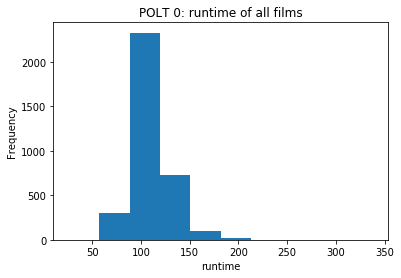

In [22]:
# polt histogram of all films runtime
df_profits.runtime.plot(kind='hist');

# title and labels
plt.title('POLT 0: runtime of all films')
plt.xlabel('runtime');

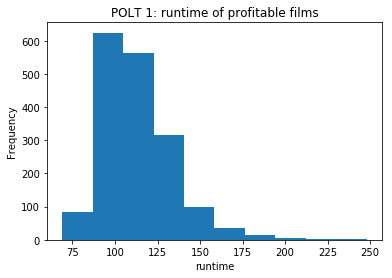

In [23]:
# polt histogram of profitable films runtime
df_profits.query('profit_evaluation == "profitable"').runtime.plot(kind='hist')

# title and labels
plt.title('POLT 1: runtime of profitable films')
plt.xlabel('runtime');

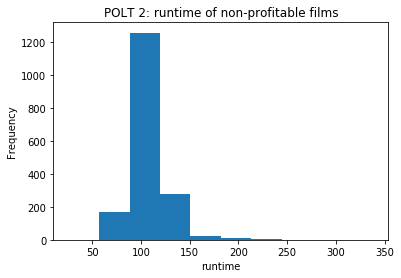

In [24]:
# polt histogram of non-profitable films runtime
df_profits.query('profit_evaluation == "non-profitable"').runtime.plot(kind='hist')


# title and labels
plt.title('POLT 2: runtime of non-profitable films')
plt.xlabel('runtime');

> **To be more accurate, we will divide the column'runtime' into three groups (short,long,very_long) and we will group the data by the new column 'film_runtime_type' (which contains the three groups) and calulate the ratio of the films count of each group to the films count of each type(profitable and non-profitable).**

In [25]:
# Bin edges that will be used to cut the data into three groups
bin_edges = [60,100,150,250] #note: we ignore the outliers because they will give us inaccurate results

# Bin names that will be used to name the three groups
bin_names = ['short','long','very_long']

# Create the column 'film_runtime_type' which determines which group the film will be in based on column 'runtime'
df_profits['film_runtime_type'] = pd.cut(df['runtime'],bin_edges,labels = bin_names)

# testing
df_profits.head(1)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,release_year,profits,ratio_profit_budget,profit_evaluation,film_runtime_type
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,1363528810,9.090192,profitable,long


In [26]:
# group the data by 'profit_evaluation' first and 'film_runtime_type' second,then count all films for every group and type
film_runtime_type_totals = df_profits.groupby(['profit_evaluation','film_runtime_type']).runtime.count()

# testing
film_runtime_type_totals

profit_evaluation  film_runtime_type
non-profitable     short                 752
                   long                  949
                   very_long              35
profitable         short                 565
                   long                 1087
                   very_long              88
Name: runtime, dtype: int64

In [27]:
# group the data by 'profit_evaluation',then count profitable and non-profitable films
film_runtime_type_counts = df_profits.groupby('profit_evaluation').runtime.count()

# testing
film_runtime_type_counts

profit_evaluation
non-profitable    1738
profitable        1740
Name: runtime, dtype: int64

In [28]:
# to get the proportions ,we will divide 'film_runtime_type_totals' on 'film_runtime_type_counts' for only profitable films
profitable_proportions = film_runtime_type_totals['profitable'] / film_runtime_type_counts['profitable']

# testing
profitable_proportions

film_runtime_type
short        0.324713
long         0.624713
very_long    0.050575
Name: runtime, dtype: float64

In [29]:
# to get the proportions ,we will divide 'film_runtime_type_totals' on 'film_runtime_type_counts' for only non-profitable films
non_profitable_proportions = film_runtime_type_totals['non-profitable'] / film_runtime_type_counts['non-profitable']

# testing
non_profitable_proportions

film_runtime_type
short        0.432681
long         0.546030
very_long    0.020138
Name: runtime, dtype: float64

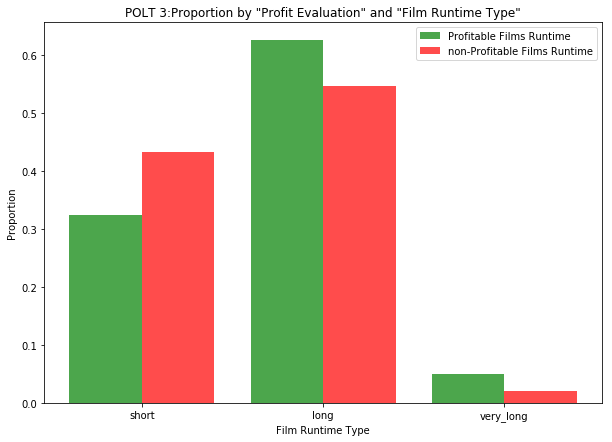

In [30]:
ind = np.arange(len(profitable_proportions))     # the x locations for the groups
width = 0.4                                      # the width of every bar

# making plot much bigger to make it visible
plt.figure(figsize=(10,7))

# plot bars
profitable_bars = plt.bar(ind, profitable_proportions,width, color='g', alpha=.7, label='Profitable Films Runtime')
non_profitable_bars = plt.bar(ind + width, non_profitable_proportions,width, color='r', alpha=.7, label='non-Profitable Films Runtime')

# putting a title to the polt and axes
plt.title('POLT 3:Proportion by "Profit Evaluation" and "Film Runtime Type"')
plt.ylabel('Proportion')
plt.xlabel('Film Runtime Type')
locations = ind + width / 2            # xtick locations
labels = ['short','long','very_long']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

<a id='3'></a>
### Research Question 3  (What is the year which have high productivity of profitable films?<br>And what is the year which have low productivity of profitable films?<br>And what is the most profitable year?<br>And what is the most non-profitable year?)<br><br>
>**Answers of the Questions:**<br>
**1-**The year which has high productivity of profitable films is 2011.(Ans Q3.1)  
**2-**The years which have low productivity of profitable films are 1966.(Ans Q3.2)  
**3-**The most profitable year(Based on only profits) is 2015 and also this year has also the greatest profits in the history.(Ans Q3.3)  
**4-**The most profitable year(Based on ratio of profits to budget) is 1975.(Ans Q3.3)  
**5-**The most non-profitable year(Based on only profits) is 1966 and this year has also the lowest profits in the history.(Ans Q3.4)  
**6-**The most non-profitable year(Based on ratio of profits to budget) is 2000.(ans Q3.4)<br><br>

>**Observations from the polts:**<br>
**1-**(from PLOT 4),it seems that the productivity of films increases by years and there are only one fall in productivity(the fall was almost after year 2010).  
**2-**(from PLOT 5),it seems that the average budgets increases by years and there are only one great fall(it was after year 2010)  
**3-**(from PLOT 6),it seems that the average profits is periodically distributed but in general the average profits increases by long periods (that means it is realy hard to predict the average profits in the next years with avaliable data,but in any way after a long time from now the average profits will be higher than now).  
**4-**(from PLOT 7),it seems that the ratio of profits to budgets is periodically distributed in the first years but almost after year 1978 the ratio decreases by years and in the last years it seems constient by the time(that means that although the average profits is periodically distributed over all time, the profits with respect to budgets decreases by years(may be the reason of that is the hacking of films which increases and developes by the time))<br>**note :This polt is better than the pervious polt because at least we can make good predictions based on it.**  
**5-**(from PLOT 8),it seems that the sum of profits for every year increases by time(that means the field of films production is quite profitable, but (from PLOt 6),it seems that the profits sum distribution by years isn't proportional to profits average distribution by years **what makes us prefer the PLOT 8 to the PLOT 6 and POLT 7 becaues it is the best to make good predictions like(increasing of profits by year)**)

In [31]:
def df_release_year(film_type = "pro"):
    '''
    this function takes the film type("profitable" or "non-profitable") as an argument
    then returns the data with four columns the films count, the budget mean, the profits mean, the ratio of profits to budget
    for every year based on the type of the film.
    HINT :film_type takes:
          "pro" means "profitable (by default)
          "non" means "non-profitable"
          "all" means all films
    '''
    # define the dataframe 'df_profits_query'
    df_profits_query = []
    # filter the data based on the 'film_type'
    if film_type == "pro":
        df_profits_query = df_profits.query('profit_evaluation == "profitable"')
    elif film_type == "non":
        df_profits_query = df_profits.query('profit_evaluation == "non-profitable"')
    elif film_type == "all":
        df_profits_query = df_profits
    else:
        print("the film_type that was entered is not defined by the function.")
        print('HINT :"film_type" takes :"pro" means "profitable (by default),"non" means "non-profitable","all" means all films')

        
    # group the data by release_year and count the films for every year
    df_release_year_counts = df_profits_query.groupby('release_year').count()
    # rename any column(such as film_runtime_type) to be represented as films_counts
    df_release_year_counts.rename(columns={'film_runtime_type': 'films_counts'}, inplace=True)
    
    # group the data by release_year and calculate the mean of the films budgets for every year
    df_release_year_budget_mean = df_profits_query.groupby('release_year').budget.mean()
    
    # group the data by release_year and calculate the mean of the films profits for every year
    df_release_year_profits_mean = df_profits_query.groupby('release_year').profits.mean()
    
    # group the data by release_year and calculate the sum of the films profits for every year
    df_release_year_profits_sum = df_profits_query.groupby('release_year').profits.sum()

    # add the columns 'df_release_year_budgets_mean','df_release_year_profits_mean' and 'df_release_year_profits_sum' to 'df_release_year_counts'
    df_release_year_counts['budget_mean'] = df_release_year_budget_mean
    df_release_year_counts['profits_mean'] = df_release_year_profits_mean
    df_release_year_counts['profits_sum'] = df_release_year_profits_sum
    
    # calculate the ratio of profits_mean to budget_mean (it is more accurate to know what is the most profitable year)
    df_release_year_counts['ratio_profit_budget'] = df_release_year_profits_mean / df_release_year_budget_mean
    

    # drop the useless columns and keep the columns we need
    df_release_year_mean_sum = df_release_year_counts[["films_counts","budget_mean","profits_mean","profits_sum","ratio_profit_budget"]]
    
    # return the data 'df_release_year'
    return df_release_year_mean_sum


# testing
df_release_year().head()

,films_counts,budget_mean,profits_mean,profits_sum,ratio_profit_budget
release_year,,,,,
1960,2,6.403474e+06,39596526.0,79193052,6.183601
1961,2,5.000000e+06,124768418.0,249536836,24.953684
1962,3,1.036667e+07,49500000.0,148500000,4.774920
1963,2,1.680750e+07,51516882.5,103033765,3.065113
1964,3,8.833333e+06,90890909.0,272672727,10.289537


In [32]:
# Build the fuction which returns information about films with highest and lowest values in columns as column'profits'.
def max_min_release_year(column_name,value_wanted,film_type):
    '''
    This function takes 'the column' which we want to know its max or min value and 'the value we want',
    is that the max value'x' or the min value'n'?,
    then returns the min or max value of the column, 
    then print the information of the year which have the value(min or max).
    Hint :"value_wanted", max value takes "x" and min value take "n"
    '''
    df_max_min = []
    if value_wanted == 'x':
        # Assign 'df_max_min' to the row which contains the higest value in 'column_name'.
        max_value = df_release_year(film_type)[column_name].max()
        df_max_min = df_release_year(film_type)[df_release_year(film_type)[column_name] == max_value]
        
    elif value_wanted == 'n':
        # Assign 'df_max_min' to the row which contains the lowest value in 'column_name'.
        min_value = df_release_year(film_type)[column_name].min()
        df_max_min = df_release_year(film_type)[df_release_year(film_type)[column_name] == min_value]
        
    else:
        # print a message that tells the user that he enters a valid value to 'value_wanted'.
        print('function can not define the "value_wanted" you entered,please enter the right "value_wanted".')
        print('Hint :"value_wanted", max value takes "x" and min value take "n"')
        

    # Print the film information from data vertically.
    for index, row in df_max_min.iterrows():
        display(row.to_frame())

In [33]:
# Answer(Q3.1)...the year which have high productivity of profitable films
max_min_release_year('films_counts','x','pro')

,2011
films_counts,8.800000e+01
budget_mean,6.325227e+07
profits_mean,1.688119e+08
profits_sum,1.485545e+10
ratio_profit_budget,2.668867e+00


In [34]:
# Answer(Q3.2)...the year which have low productivity of profitable films
max_min_release_year('films_counts','n','pro')

,1966
films_counts,1.000000e+00
budget_mean,7.500000e+06
profits_mean,2.623669e+07
profits_sum,2.623669e+07
ratio_profit_budget,3.498225e+00


In [35]:
# Answer(Q3.3)...the most profitable year (Based on the profits mean)...(not very accurate)
max_min_release_year('profits_mean','x','all')

,2015
films_counts,1.480000e+02
budget_mean,4.732147e+07
profits_mean,1.279140e+08
profits_sum,1.893127e+10
ratio_profit_budget,2.703086e+00


In [36]:
# Answer(Q3.3)...the most profitable year (Based on the ratio of profits to the budget)...(very accurate)
max_min_release_year('ratio_profit_budget','x','all')

,1975
films_counts,8.000000e+00
budget_mean,4.012500e+06
profits_mean,9.642174e+07
profits_sum,7.713739e+08
ratio_profit_budget,2.403034e+01


In [37]:
# the year which has the greatest profits (Based on only the sum of profits not the mean)
max_min_release_year('profits_sum','x','all')

,2015
films_counts,1.480000e+02
budget_mean,4.732147e+07
profits_mean,1.279140e+08
profits_sum,1.893127e+10
ratio_profit_budget,2.703086e+00


In [38]:
# Answer(Q3.4)...the most non-profitable year (Based on the mean)...(not very accurate)
max_min_release_year('profits_mean','n','all')

,1966
films_counts,5.000000e+00
budget_mean,6.453600e+06
profits_mean,1.049374e+07
profits_sum,5.246869e+07
ratio_profit_budget,1.626029e+00


In [39]:
# Answer(Q3.4)...the most profitable year (Based on the ratio of profits to the budget)...(very accurate)
max_min_release_year('ratio_profit_budget','n','all')

,2000
films_counts,9.900000e+01
budget_mean,4.795657e+07
profits_mean,6.140092e+07
profits_sum,6.078691e+09
ratio_profit_budget,1.280344e+00


In [40]:
# the year which has the lowest profits (Based on only the sum of profits not the mean)
max_min_release_year('profits_sum','n','all')

,1966
films_counts,5.000000e+00
budget_mean,6.453600e+06
profits_mean,1.049374e+07
profits_sum,5.246869e+07
ratio_profit_budget,1.626029e+00


In [41]:
def df_release_year_polt(column_name,film_type,title_plot,y_label,color_line):
    '''
    this function takes column name and a title for the polt and a title for y axis as arguments,
    then return the polt of the column values with release_year.
    '''
    # make list of release_years sorted
    release_years = df_profits['release_year'].sort_values().unique()
    
    # Polt the column.
    # making plot much bigger to make it visible
    plt.figure(figsize=(10,7))

    # plot "line and bar polts" of the column(in arguments) by years
    plt.plot(release_years,df_release_year(film_type)[column_name],color_line)
    plt.bar(release_years,df_release_year(film_type)[column_name])
    
    # title and labels
    plt.title(title_plot)
    plt.xlabel('Release Year')
    plt.ylabel(y_label);

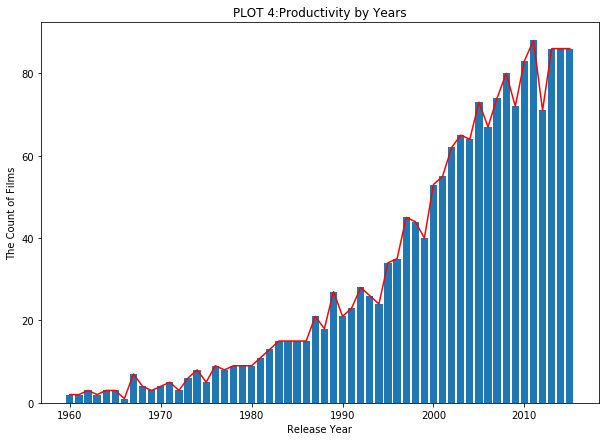

In [42]:
# plot the number of profitable films produced over years.
df_release_year_polt('films_counts','pro','PLOT 4:Productivity by Years','The Count of Films','r')

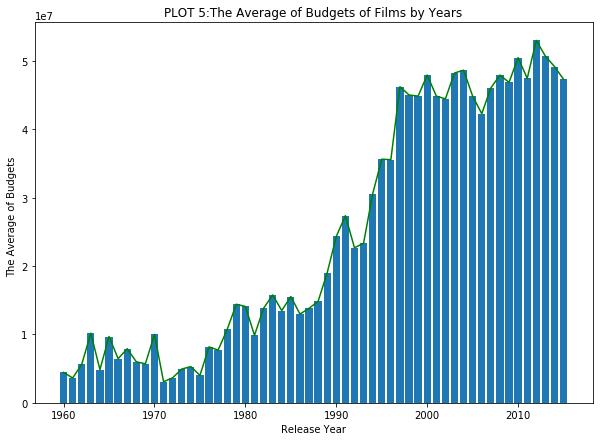

In [43]:
# plot budgets average of all films by years
df_release_year_polt('budget_mean','all','PLOT 5:The Average of Budgets of Films by Years','The Average of Budgets  ','g')

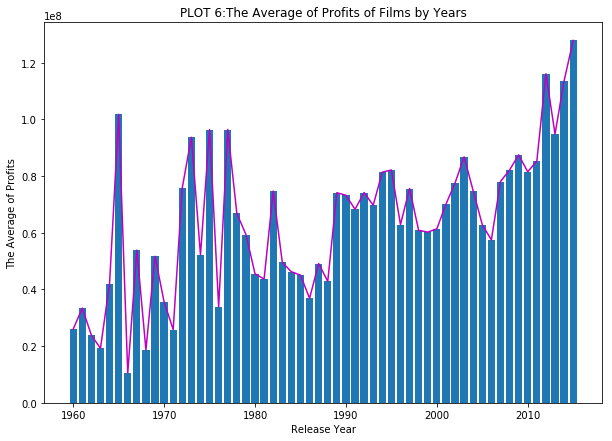

In [44]:
# plot profits average of all films by years
df_release_year_polt('profits_mean','all','PLOT 6:The Average of Profits of Films by Years','The Average of Profits','m')

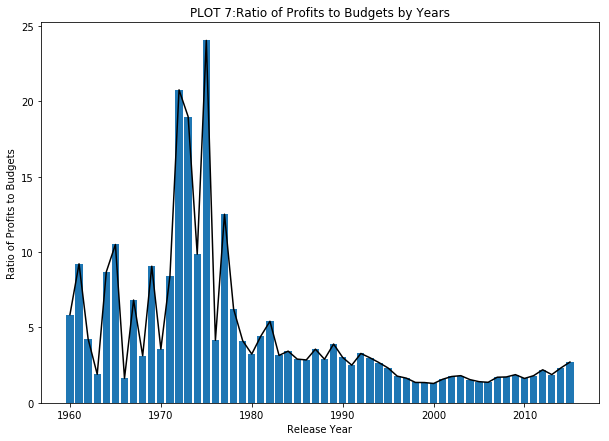

In [45]:
# plot the ratio of profts to the budget of every year
df_release_year_polt('ratio_profit_budget','all','PLOT 7:Ratio of Profits to Budgets by Years','Ratio of Profits to Budgets','k')

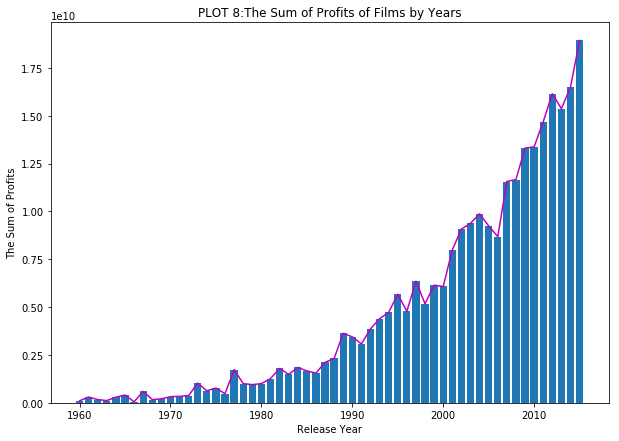

In [46]:
# plot profits sum of all films by years
df_release_year_polt('profits_sum','all','PLOT 8:The Sum of Profits of Films by Years','The Sum of Profits','m')

<a id='4'></a>
### Research Question 4  (What are the most successful genres of profitable films?<br>And what are the most unsuccessful genres of profitable films?)<br><br>
>**Observations and answers:**  
**1-**The most successful genres of profitable films are {Drama,Comedy,Action} (from POLT 9)  
**2-**The most unsuccessful genres of profitable films are {TV movie,Documentary,western} (from POLT 9)

In [47]:
def count_data_profitable(column_name,values_number="all"):
    '''
    this function takes the column (which contains more than one value in one row sperated by "|") and
    the 'values_number' which determine how many values you want to count from the top,
    then add the values to array after spliting them and then,
    retuens the occurrance count of every value in the data in a dictionary.(only profitable films)
    Hint :argument 'values_number' takes values "all" or number(by default "all").
    '''            
    values_array = []   # the array which contains the values(after spliting)
    values_array_1d = []  # the array after converting it from 2D array to 1D array (to count the values)

    # split values and append them to 'values_array'
    df_profits_query = df_profits.query('profit_evaluation == "profitable"') # only profitable films
    for row in df_profits_query[column_name]:
        values_array.append(row.split('|'))
    
    # convert 2D array 'values_array' to 1D array and append the values to array 'values_array_1d'
    for n in range(len(values_array)):
        for i in range(len(values_array[n])):
            values_array_1d.append(values_array[n][i])
    
    # count the occurrance of values in data
    unique, counts = np.unique(values_array_1d, return_counts=True)
    # gather the values and their counts in one dictionary
    values_counts = dict(zip(unique, counts))
    # sort the counts of values in descending order
    values_counts_sorted = dict(sorted(values_counts.items(), key=operator.itemgetter(1),reverse=True))
    
    
    # get only n of the top values (n is values_number(int))
    values_counts_top = {}  # dictionary for the n top values
    if values_number == "all":
        values_counts_list = values_counts_sorted
    else:
        for n in range(values_number): # take the counts of only n top values.and add them to dict 'values_counts_top'
            values_counts_top[list(values_counts_sorted)[n]] = values_counts_sorted[list(values_counts_sorted)[n]] # append n top values with their counts
        # sort the counts of n top values (dictionary 'values_counts_top' destroys the order)
        values_counts_list = sorted(values_counts_top.items(), key=operator.itemgetter(1),reverse=True)
    
    
    # return
    return values_counts_list

In [48]:
def count_data_pro_plot(column_name,values_number,plot_title):
    '''
    this function takes column_name and the number of top values we want to plot(values_number) as arguments,
    then returns a bar plot of these column values and their counts.
    '''
    # call the function 'count_data_profitable' to count the values in the column and assign the the results of the function to 'values'
    values = count_data_profitable(column_name,values_number)  # a dictionary which contains values and their counts of the column
    
    # the background of the plot
    sns.set(style="darkgrid")

    # plot the horizontal bar plot of the 'values' dictionary and make the plot much bigger
    fig, ax = plt.subplots(figsize=(15,10))
    # plot the horizontal bars and give the function 'ax' the inforamtion of the the data we want to plot
    ax.barh(range(len(values)), list(values.values()),color='blue', ecolor='red')
    ax.set_yticks(range(len(values)))
    ax.set_yticklabels(list(values.keys()))
    
    ax.invert_yaxis() # labels read top-to-bottom
    
    # title and labels
    ax.set_title(plot_title,fontsize=20)
    ax.set_xlabel('frequency',fontsize =15)
    ax.set_ylabel(column_name,fontsize =15);

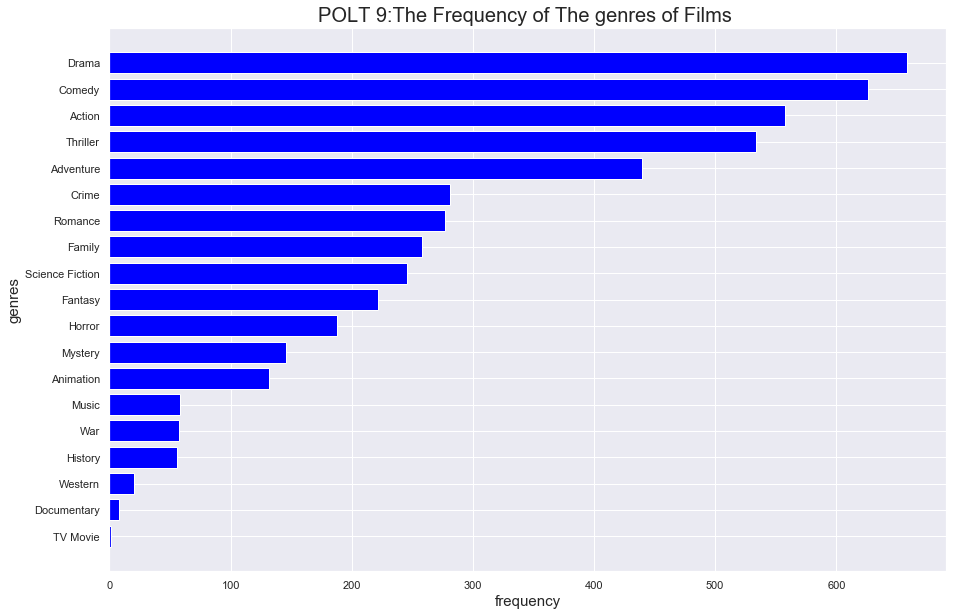

In [49]:
# plot of the frequency of the films genres
count_data_pro_plot("genres","all","POLT 9:The Frequency of The genres of Films ")

<a id='5'></a>
### Research Question 5  (Who are the actors who have the greatest number of profitable films?)<br><br>
>**Answer:**  
The actor who have the first greatest number of profitable films is Tom Cruise(29 films)  
The actor who have the second greatest number of profitable films is Tom Hanks(28 films)  
The actor who have the third greatest number of profitable films is Brad Pitt(27  films)

In [50]:
# the first five actors who have the greatest number of profitable films
count_data_profitable("cast",5)

[('Tom Cruise', 29),
 ('Tom Hanks', 28),
 ('Brad Pitt', 27),
 ('Robert De Niro', 25),
 ('Bruce Willis', 24)]

<a id='6'></a>
### Research Question 6  (What are the production companies which have the greatest number of profitable films?)<br><br>
>**Answer:**  
The production company who have the first greatest number of profitable films is Universal Pictures(196 films)  
The production company who have the second greatest number of profitable films is Warner Bros(183 films)  
The production company who have the third greatest number of profitable films is Paramount Pictures(157 films)

In [51]:
# the first five production companies who have the greatest number of profitable films
count_data_profitable("production_companies",5)

[('Universal Pictures', 196),
 ('Warner Bros.', 183),
 ('Paramount Pictures', 157),
 ('Twentieth Century Fox Film Corporation', 137),
 ('Columbia Pictures', 112)]

<a id='7'></a>
### Research Question 7  (Who are the directors who have the greatest number of profitable films?)<br><br>
>**Answer:**  
The director who have the first greatest number of profitable films is Steven Spielberg(24 films)  
The director who have the second greatest number of profitable films is Clint Eastwood(16 films)  
The director who have the third greatest number of profitable films is Tim Burton(14 films)

In [52]:
# group the data by 'director' then count the number of profitable films for every director
df_directors = df_profits.query('profit_evaluation == "profitable"').groupby('director').director.count()

# sort the counts in descending order to know the directors who have the greatest number of profitable films
df_directors_sorted = df_directors.sort_values(ascending=False,inplace=True)
df_directors.head(5)

director
Steven Spielberg    24
Clint Eastwood      16
Tim Burton          14
Ridley Scott        13
Robert Zemeckis     13
Name: director, dtype: int64

<a id='8'></a>
### Research Question 8  (What are the average of budgets,the average of revenues,the average of profits and the average runtime for all profitable films?)<br><br>
>**Answer:**  
The average of profitable films budget is 52536855.6471 dollars.  
The average of profitable films revenue is 208847696.263 dollars.  
The average of profitable films profits is 156310840.616 dollars.  
The average of profitable films runtime is 112.520689655 minutes.

In [53]:
def average_profitable(column_name):
    '''
    this function takes the column_name as an argument,
    then returns the average of values in this column.
    these values are only for profitable films.
    '''
    # filter the data to analysis only the profitable films data
    df_profitable = df_profits.query('profit_evaluation == "profitable"')
    # get the mean for the values of the column
    df_average = df_profitable[column_name].mean()
    
    # return
    return df_average

In [54]:
# call the function 'average_profitable' to calculate the average of profitable films budget
average_budget = average_profitable("budget")
# print the budget average
print("The average of profitable films budget is",average_budget,"$")

The average of profitable films budget is 52536855.647126436 $


In [55]:
# call the function 'average_profitable' to calculate the average of profitable films revenue
average_revenue = average_profitable("revenue")
# print the revenue average
print("The average of profitable films revenue is",average_revenue,"$")

The average of profitable films revenue is 208847696.26264367 $


In [56]:
# call the function 'average_profitable' to calculate the average of profitable films profits
average_profits = average_profitable("profits")
# print the profits average
print("The average of profitable films profits is",average_profits,"$")

The average of profitable films profits is 156310840.61551723 $


In [57]:
# call the function 'average_profitable' to calculate the average of profitable films runtime
average_runtime = average_profitable("runtime")
# print the runtime average
print("The average of profitable films runtime is",average_runtime,"minutes")

The average of profitable films runtime is 112.52068965517242 minutes


In [58]:
# the most profitable films according to the analysis we do
df_profitable = df_profits.query('profit_evaluation == "profitable"' and 'budget <= 52536855' and 'profits >= 156310840')

# testing
df_profitable.head(3)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,release_year,profits,ratio_profit_budget,profit_evaluation,film_runtime_type
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,1363528810,9.090192,profitable,long
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015,228436354,1.522909,profitable,long
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015,185238201,1.683984,profitable,long


<a id='conclusions'></a>
## Conclusions<br><br><br>

> **From analysis, we can know the features of profitable films:**<br>
**1-**Budget is around 52.5 million dollars.  
**2-**Revenue is around 209 million dollars.  
**3-**Profits is around 156 million dollars.  
**4-**Runtime is around 113 minutes.<br><br>

>**To make a successful film:**<br>
**1-**Budget should be around or less than 52.5 million dollars.  
**2-**Runtime should be around 113 minutes(or in interval [90:150] from POLT 1).  
**3-**Cast should have one of these actors (Tom Cruise,Tom Hanks,Brad Pitt,Robert De Niro,Bruce Willis).  
**4-**Genre should be one of these genres (Drama,Comedy,Action,Thriller,Adventure).  
**5-**Production company should be one of these campanies (Universal Pictures,Warner Bros,Paramount Pictures,Twentieth Century Fox Film Corporation,Columbia Pictures).  
**6-**Director should be one of these directors (Steven Spielberg,Clint Eastwood,Tim Burton,Ridley Scott,Robert Zemeckis).<br><br>

>**There are some observations on the data and becaues of that, there are some limits and restrictions on the predictions.**<br><br>
**Observations and Limits:**  
**1-**We notice that the data don't have units for budget,revenue and runtime.Becaues of that, these predictions are based on dollar as a currency and minute as time measurement unit.  
**2-**We notice that there are outliers on runtime column and we ignore them.Becaues of that, these predictions are based on making these outliers incorrect values.  
**3-**We notice that there are unreasonable values to some columns(budget,revenue) like(0,100,113,...) so we drop them,Because of that, predictions are based on ignoring these values becaues we believe that there are some mistakes while writing this data and that make the data go smaller and that make predictions not have much accuracy.(limits are budget > 50000 and revenue > 50000)  
**4-**We consider that the profitable films are the films which their profits are more than 25 million dollars,Because of that, predictions are based on making the films with profits more than 25 M dollars profitable.  
**5-**We don't have any information about the ways of collecting this data.That means these predictions could be build on wrong and inaccurate data or not on up-to-date data.  
**6-**Our predictions about 'To make a successful film' is build on some factors of success but not all factors.There are many other factors to make a successful film like the plot, the scenario,the good acting of actors and ofcourse the lack of problems in filming or between the companies and the actors...etc

In [59]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate TMDB Movies Dataset.ipynb'])

0